In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('D:/Academy/fourth_year_2nd_semester/lab/AI/lap_codes/game_data.csv')

In [11]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?,Unnamed: 5
0,1.0,Sunny,Cold,Indoor,No,NaN
1,2.0,Cloudy,Cold,Indoor,Yes,NaN
2,3.0,Cloudy,Warm,Outdoor,No,NaN
3,4.0,Sunny,Cold,Outdoor,Yes,NaN
4,5.0,Cloudy,Cold,Outdoor,Yes,NaN
5,6.0,Sunny,Warm,Outdoor,No,NaN
6,7.0,Cloudy,Warm,Indoor,No,NaN
7,8.0,Sunny,Warm,Indoor,No,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = pd.read_csv('game_data.csv').drop(columns=['Unnamed: 5'])
df = df.dropna(how='all')  # Drops entirely empty rows (like rows 8-10)
df = df.drop(['Days'], axis=1)  # Drops the 'Days' column
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes


In [20]:
df.value_counts() #Shows counts of unique value combinations in the DataFrame

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Name: count, dtype: int64

Data processing. 

In [ ]:
x = df.drop(columns=['Wear Jacket?'], axis=1)
y = df['Wear Jacket?']


0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
x[['Outlook', 'Temprature', 'Routine']] = x[['Outlook', 'Temprature', 'Routine']].apply(lambda col: le.fit_transform(col))

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


Decision Tree Classifier Implementation

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [30]:
clf.fit(x,y) #train the decision tree model on the encoded data

DecisionTreeClassifier()

Making predictions

In [32]:
clf.predict([[1, 0, 0]]) # Sunny, Cold, Indoor = No

array(['No'], dtype=object)

In [33]:
clf.score(x,y)

1.0

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.75, '  False')]

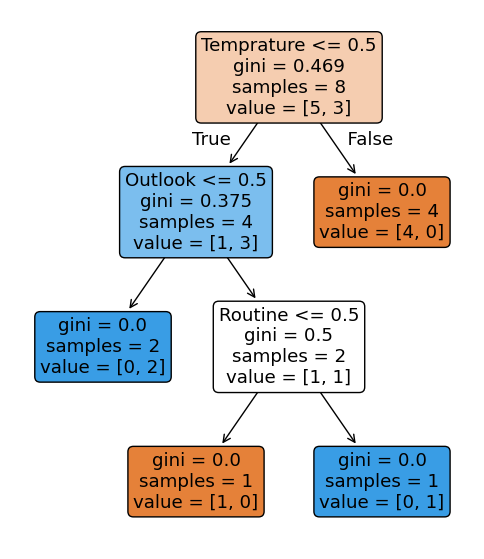

In [34]:
plt.figure(figsize=(6,7))
tree.plot_tree(clf, feature_names=x.columns, filled=True, rounded=True )